카이제곱 관련 쓰려면
pip install pandas matplotlib scipy

seaborn 없으면 
pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


import seaborn as sns
from scipy.stats import chi2_contingency

In [7]:
Mush = pd.read_csv('Mushroom2.csv')
Mush

,Unnamed: 0,poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,poison,convex,smooth,brown,bruises,pungent,free,close,narrow,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
1,1,enable,convex,smooth,yellow,bruises,almond,free,close,broad,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,2,enable,bell,smooth,white,bruises,anise,free,close,broad,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,3,poison,convex,scaly,white,bruises,pungent,free,close,narrow,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
4,4,enable,convex,smooth,gray,no,none,free,crowded,broad,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,enable,knobbed,smooth,brown,no,none,attached,close,broad,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,8120,enable,convex,smooth,brown,no,none,attached,close,broad,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,8121,enable,flat,smooth,brown,no,none,attached,close,broad,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,8122,poison,knobbed,scaly,brown,no,fishy,free,close,narrow,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [8]:
Mush.columns

Index(['Unnamed: 0', 'poison', 'cap_shape', 'cap_surface', 'cap_color',
       'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
       'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [9]:
Mush = Mush[Mush['stalk_root'] != 'missing']

In [3]:
Mush = Mush[['poison',]]   # 사용할 칼럼 리스트 넣어서 쓰면 됩니다.
Mush

,poison
0,poison
1,enable
2,enable
3,poison
4,enable
...,...
8119,enable
8120,enable
8121,enable
8122,poison


In [10]:
# chi2_contingency << 교차표 제작 후 해당 교차표를 변수로 사용 시 카이제곱한 결과 출력
# statistic이 카이제곱 검정값, 관측 빈도와 기대 빈도 간 차이 의미 // 해당 값으로는 결론 불가능
# p-value = 본판, 0.05 보다 작다면 두 변수간의 관계가 유의미하다고 볼 수 있다. 연관성 의미
# dof = 자유도
# 4개의 요소로 이루어진 튜플형식으로 나온다. 카이제곱 검정값, pvalue, 자유도, 무슨 ... 기대 어쩌고 리스트 뭉탱이

# # crosstab :  두 변수에 대한 교차표 만드는 함수 // 두 개 이상의 데이터 배열에 대한 단순 교차표를 계산
# odor = pd.crosstab(Mush['cap_shape'], Mush['poison'])
# print(chi2_contingency(odor))
# type(chi2_contingency(odor))

In [ ]:
def poison_chi_def(col):
    temp = pd.crosstab(Mush[col], Mush['poison'])
    temp_chi = chi2_contingency(temp)[0]
    temp_p_value = chi2_contingency(temp)[1]
    return temp_chi, temp_p_value

In [ ]:
for i in list(Mush.columns[1:]):
    print("독성 -", end=" ")
    print("{:<20}".format(i), end=" ")
    print(f": 카이제곱 검증값 {poison_chi_def(i)[0]},   p-value {round(poison_chi_def(i)[1],2)}", end= " ")
    if poison_chi_def(i)[1] < 0.05:
        print("유효")
    else:
        print("버려야함.")

독성 - cap_shape            : 카이제곱 검증값 489.91995361895573,   p-value 0.0 유효
독성 - cap_surface          : 카이제곱 검증값 315.0428312080377,   p-value 0.0 유효
독성 - cap_color            : 카이제곱 검증값 387.59776897722986,   p-value 0.0 유효
독성 - bruises              : 카이제곱 검증값 2041.4156474619554,   p-value 0.0 유효
독성 - odor                 : 카이제곱 검증값 7659.726740165339,   p-value 0.0 유효
독성 - gill_attachment      : 카이제곱 검증값 133.9861812865668,   p-value 0.0 유효
독성 - gill_spacing         : 카이제곱 검증값 984.1433330144739,   p-value 0.0 유효
독성 - gill_size            : 카이제곱 검증값 2366.8342569059605,   p-value 0.0 유효


In [ ]:
def hitmap_chi(col):
    sns.heatmap(odor, annot=True, cmap="YlGnBu")
    plt.title(f"{col}")
    plt.show()

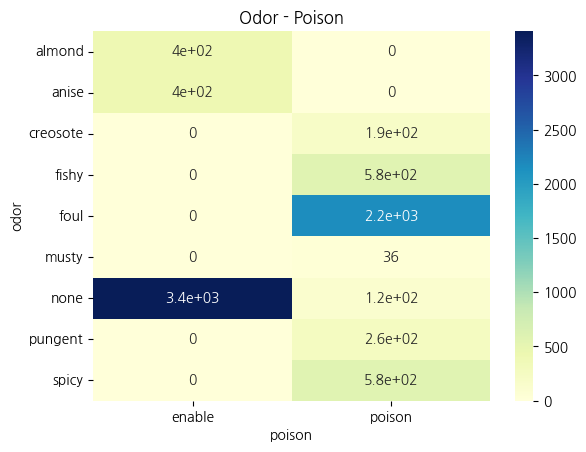

In [ ]:
sns.heatmap(pd.crosstab(Mush['odor'], Mush['poison']), annot=True, cmap="YlGnBu")
plt.title("Odor - Poison")
plt.show()

# sns.heatmap(crosstab_bruises, annot=True, cmap="YlGnBu")
# plt.title("Bruises - Poison")
# plt.show()

In [ ]:
def just_cross(col):
    col = str(col)
    a = pd.crosstab(Mush[col], Mush['poison'])
    return a

In [ ]:
col = 'odor'
print(just_cross(col))

poison    enable  poison
odor                    
almond       400       0
anise        400       0
creosote       0     192
fishy          0     576
foul           0    2160
musty          0      36
none        3408     120
pungent        0     256
spicy          0     576


In [ ]:
# axes 위치조정 테스트
row = 3
col = 2
idx = 0
test_list = []
ax_1= 0
ax_2 = 0
# for c in list(Mush.columns[1:]):
for c in range(6):
    if idx % col == 0 :
        ax_1 += 1

    if idx / col in range(1,5) :
        ax_2 = 0
    print(f'axes[{ax_1-1},{ax_2}]')
    ax_2 += 1   # 더하다가 0되는 순간 0
    idx += 1

    test_list.append(f'axes[{ax_1-1},{ax_2}]')

axes[0,0]
axes[0,1]
axes[1,0]
axes[1,1]
axes[2,0]
axes[2,1]


In [ ]:
def subplot_maker(row,col):
    row = int(row)
    col = int(col)
    axes_list = []

    fig, axes = plt.subplots(row, col, figsize=(row*4, col*8))  # 서브플롯 판 제작  # 사이즈 보고 알아서 비율 맞출 것.....
    fig.suptitle('독성과 각 변수간 카이제곱', fontsize = 15 )       # 서브플롯 타이틀 
 
    idx = 0 #   # axes 위치잡는용
    ax_1 = 0
    ax_2 = 0

    # Mush 데이터 프레임 자체 칼럼 값으로 제작. list 형식만 바꾼다면 그 리스트 값에 맞는 칼럼만 들고와서 표 제작.
    for c in list(Mush.columns[1:]):
        if idx % col == 0 :
            ax_1 += 1
        if idx / col in range(1,100) :
            ax_2 = 0

        axes_list.append(f'axes[{ax_1-1},{ax_2}]')
        temp = axes[ax_1-1, ax_2]
        axes[ax_1-1, ax_2].set_title(c)
        ax_2 += 1
        idx += 1   

        idx_ax = 0

        sns.heatmap(just_cross(c), annot=True, cmap="YlGnBu", ax=temp)
        idx_ax += 1

    # plt.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.18, wspace=0.3, hspace=0.3) # 아래코드와 효과는 같으나 하나하나 값 부여해야해서 일단 주석처리.
    plt.tight_layout(pad=3.0)   # 레이아웃 타이틀, 레이블 겹치지 않게 조정하는 용 

    plt.show()


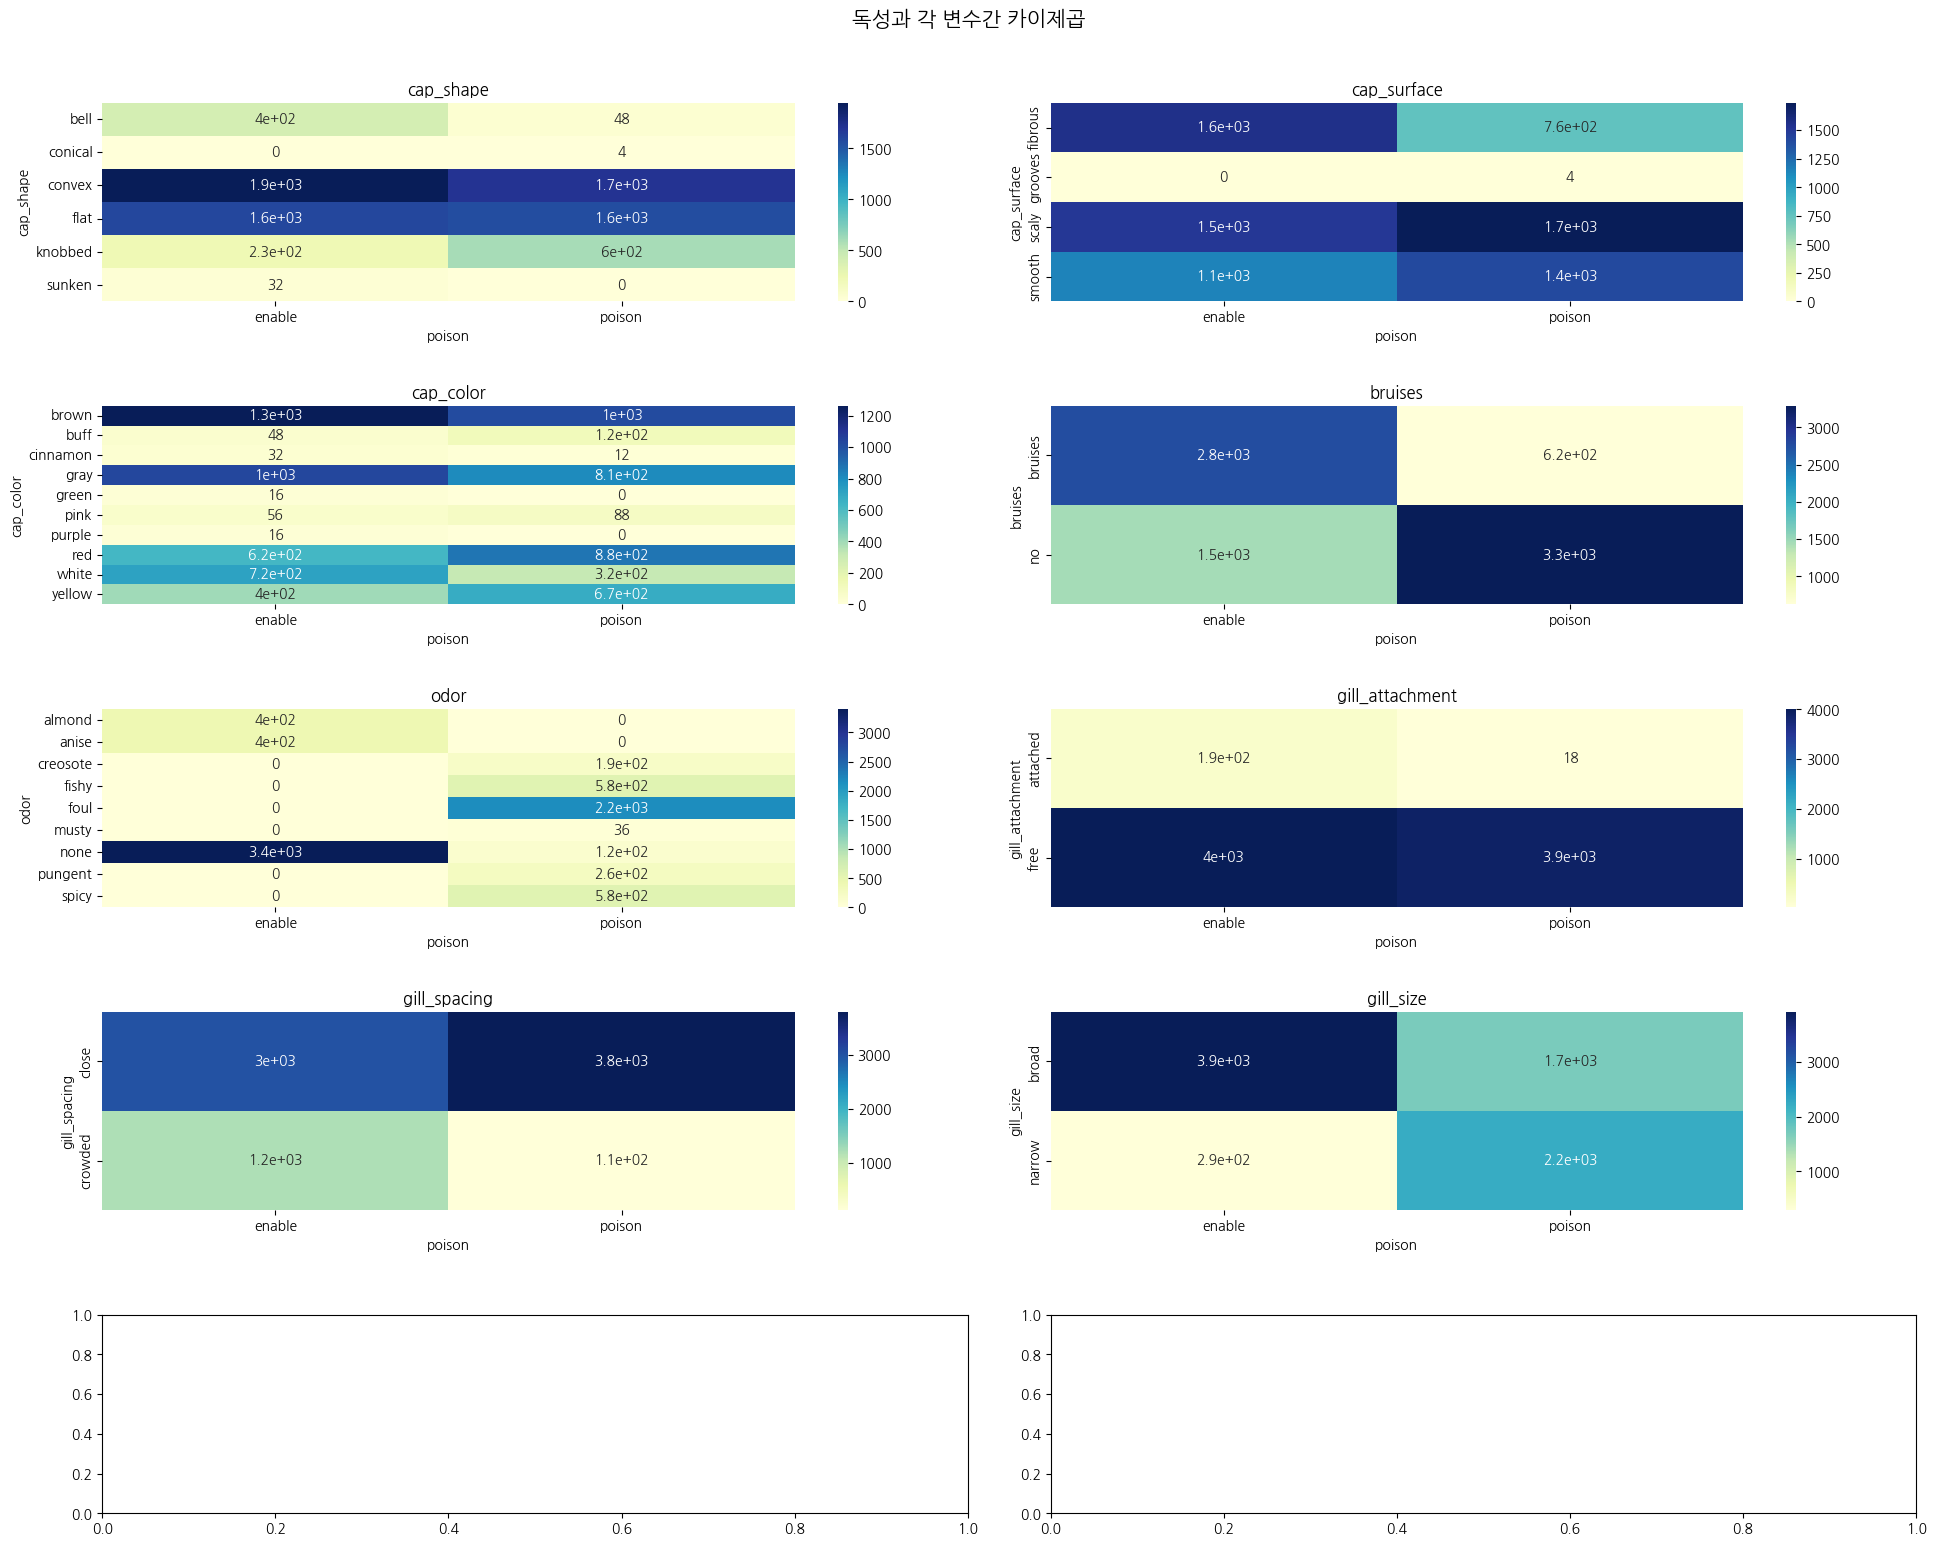

In [ ]:
subplot_maker(5,2)  # 몇행 / 몇줄로 만들것인가 입력